In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('output_lower.csv')
data.head(10)

,rating,review
0,__label__5,jeg elsker zaladnozalando har så mange forskel...
1,__label__4,handlet flere gange. gode produkter nemt at b...
2,__label__5,alt til ug. billige priser. nem returnering. s...
3,__label__2,hej betalt min regning ( troede jeg) den var å...
4,__label__5,super godt.hurtig levering og fine priser.
5,__label__2,jeg har bestilt et par sandaler ved zalando og...
6,__label__1,irriterende at få en rykker på 100 kr for mang...
7,__label__3,har køb hos zalando i mange år og har været st...
8,__label__1,synes godt nok det er for dårligt at man betal...
9,__label__1,nu har jeg oplevet flere gange hvor jeg bestil...


In [3]:
data['processed_text'] = data['review']

In [4]:
import fasttext

model = fasttext.train_supervised('output_lower.csv')
data['vec'] = data['processed_text'].apply(lambda x: model.get_sentence_vector(x))

In [5]:
# modellen kan her finde de ord der er tættes på parametret 
model.get_nearest_neighbors('dårlig')

[(0.9996325969696045, 'letbrugt'),
 (0.9996325969696045, 'bosch'),
 (0.9996325969696045, 'byggemarkedsvarer'),
 (0.9996325969696045, 'manual.'),
 (0.9996325969696045, 'træstøv'),
 (0.9996325969696045, 'værktøj'),
 (0.9996325969696045, 'elhøvl'),
 (0.9996260404586792, 'skåret'),
 (0.9996260404586792, 'afstattet'),
 (0.9996260404586792, 'mangle.')]

In [6]:
model.get_nearest_neighbors('utilfreds')

[(0.8912882804870605, ',skuffet'),
 (0.8874087333679199, 'dages'),
 (0.8868248462677002, 'skriver'),
 (0.8861773610115051, 'fejl'),
 (0.8860602378845215, 'penge...'),
 (0.8860602378845215, 'returret....'),
 (0.8860467076301575, ',behøver'),
 (0.8860325813293457, ',snyder'),
 (0.8860325813293457, 'bæredygtigheden'),
 (0.8859732747077942, '152-158')]

In [7]:
model.get_nearest_neighbors('glad')

[(0.9855144023895264, 'konkurrencedygtigt'),
 (0.9855144023895264, 'synderligt'),
 (0.9855144023895264, 'uforholdsmæssigt'),
 (0.9855144023895264, 'ordre...)'),
 (0.9854155778884888, 'utilfredshed.'),
 (0.9853348731994629, 'annulleret…'),
 (0.9853348731994629, 'pudsigt'),
 (0.9853348731994629, 'irriterende!'),
 (0.9853348731994629, ',tilføjelse:jeg'),
 (0.985162079334259, 'rekvireres')]

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

In [9]:
print(data['cluster'])

0       4
1       0
2       4
3       1
4       3
       ..
5059    3
5060    3
5061    4
5062    0
5063    3
Name: cluster, Length: 5064, dtype: int32


In [30]:
print(model.labels)

['__label__5', '__label__1', '__label__4', '__label__2', '__label__3']


In [11]:
clusterCount = np.bincount(data['cluster'])
print(clusterCount)
-np.sort(-clusterCount)

[ 997 2035  305  600 1127]


array([2035, 1127,  997,  600,  305])

In [12]:
data['rating'].value_counts(ascending=False)

__label__5     2694
__label__1     1664
__label__4      289
__label__2      261
__label__3      156
Name: rating, dtype: int64

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

In [14]:
#print(*pca.fit_transform(data['vec'].values.tolist())[:,0])

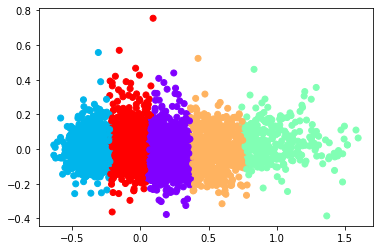

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow')

['label5', 'label1', 'label4', 'label2', 'label3'] 
 1    2035
4    1127
0     997
3     600
2     305
Name: cluster, dtype: int64


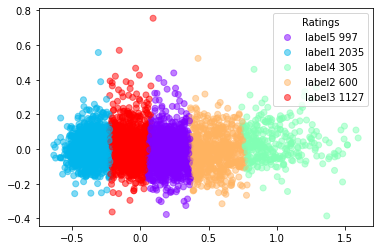

In [99]:
scatter = plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow', alpha=0.5)

dc = data['cluster'].value_counts(ascending=False)
cl = []
for i in model.labels:
    cl.append(i.replace('__',''))
print(cl, '\n', dc)

handles = scatter.legend_elements(num=[0,1,2,3,4])[0]  # extract the handles from the existing scatter plot

plt.legend(title='Ratings', handles=handles, labels=[cl[0]+' '+str(dc[0]), cl[1]+' '+str(dc[1]), cl[2]+' '+str(dc[2]), cl[3]+' '+str(dc[3]),  cl[4]+' '+str(dc[4])])

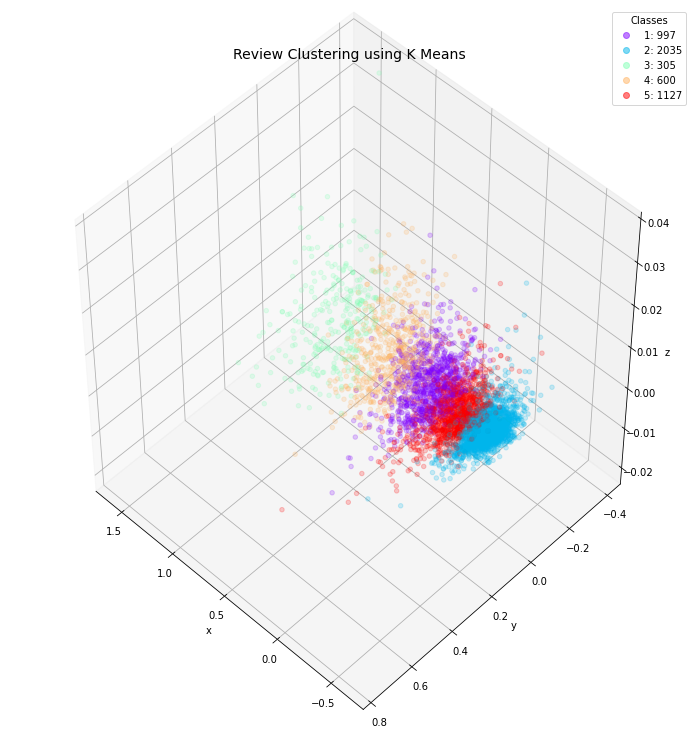

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow', alpha=0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)
plt.legend(title='Classes', handles=handles, 
           labels=['1: '+str(dc[0]),
                   '2: '+str(dc[1]),
                   '3: '+str(dc[2]),
                   '4: '+str(dc[3]),
                   '5: '+str(dc[4])])
